In [11]:
import tushare as ts
from pandas import DataFrame, Series
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
pro = ts.pro_api("6848a1962cda9db1a4f7410fc876acaced030e98e635923e2d2fad66")
df = pro.daily(**{
  'ts_code': "000005.SZ",
})

df = df[::-1]

In [64]:
df['trade_date'] = pd.to_datetime(df['trade_date'], format="%Y%m%d")
df.set_index('trade_date', inplace=True)
df

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2018-01-02,000005.SZ,4.15,4.50,4.15,4.32,4.14,0.18,4.3500,71539.34,30529.757
2018-01-03,000005.SZ,4.35,4.35,4.22,4.27,4.32,-0.05,-1.1600,67990.65,28966.791
2018-01-04,000005.SZ,4.27,4.33,4.23,4.29,4.27,0.02,0.4700,43809.78,18732.178
2018-01-05,000005.SZ,4.26,4.45,4.26,4.34,4.29,0.05,1.1700,85226.27,37286.935
2018-01-08,000005.SZ,4.29,4.41,4.27,4.37,4.34,0.03,0.6900,68722.69,29918.817
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,000005.SZ,1.83,1.83,1.81,1.81,1.83,-0.02,-1.0929,52292.39,9501.359
2022-08-02,000005.SZ,1.80,1.80,1.72,1.72,1.81,-0.09,-4.9724,124194.00,21562.720
2022-08-03,000005.SZ,1.71,1.76,1.71,1.72,1.72,0.00,0.0000,81814.02,14133.090


In [65]:
ma5 = df['close'].rolling(5).mean()[30:]
ma30 = df['close'].rolling(30).mean()[30:]

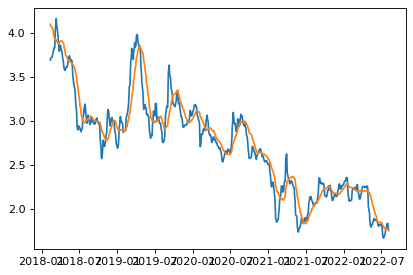

In [66]:
plt.figure(dpi=80)
plt.plot(ma5)
plt.plot(ma30)

In [67]:
s1 = ma5 < ma30
s2 = ma5 > ma30
golden_ex = s1.shift(1) & s2
death_ex = s1 & s2.shift(1)

In [68]:
golden_date = df[30:][golden_ex].index
death_date = df[30:][death_ex].index

In [69]:
golden_series = Series(data=1, index=golden_date) # 金叉
death_series = Series(data=0, index=death_date) # 死叉

s = pd.concat((golden_series, death_series))

s = s.sort_index()
s

trade_date
2018-03-07    1
2018-03-26    0
2018-05-10    1
2018-05-30    0
2018-07-19    1
2018-08-07    0
2018-08-13    1
2018-08-17    0
2018-09-21    1
2018-10-08    0
2018-11-08    1
2018-12-14    0
2019-01-11    1
2019-01-31    0
2019-02-11    1
2019-04-17    0
2019-04-18    1
2019-04-22    0
2019-06-24    1
2019-07-22    0
2019-08-21    1
2019-09-26    0
2019-12-10    1
2020-01-22    0
2020-03-04    1
2020-03-18    0
2020-06-05    1
2020-08-13    0
2020-08-18    1
2020-09-01    0
2020-11-11    1
2020-11-12    0
2020-11-13    1
2020-11-30    0
2021-02-26    1
2021-04-09    0
2021-06-11    1
2021-06-17    0
2021-06-22    1
2021-08-10    0
2021-08-13    1
2021-08-18    0
2021-08-26    1
2021-09-29    0
2021-10-21    1
2021-10-28    0
2021-12-01    1
2022-01-19    0
2022-02-21    1
2022-02-28    0
2022-03-01    1
2022-03-11    0
2022-03-29    1
2022-04-27    0
2022-07-25    1
2022-08-05    0
dtype: int64

In [70]:
# 初始资金
money_init = 3000
money_result = money_init
hold = 0 # 持股数量

for i in range(0, len(s)):
  if s[i] == 1:
    # 买股票
    golden_date = s.index[i]
    price = df.loc[golden_date]['open']
    buy_hand = money_result // (price * 100)
    hold = buy_hand * 100
    cost = hold * price
    money_result -= cost

    print(golden_date.strftime("%Y-%m-%d") + ': ' + '买入 ' + str(hold) + ' 股, 单价: ' + str(price) + ', 花费: ' + str(round(cost, 2)) + ', 资金剩余: ' + str(round(money_result,2)))
  else:
    # 卖股票
    if hold > 0:
      death_date = s.index[i]
      price = df.loc[death_date]['open']
      sell_hold = hold
      sell_amount = price * hold
      money_result += sell_amount
      hold = 0
      print(death_date.strftime("%Y-%m-%d"), ': ', '卖出 ', sell_hold, ' 股, 单价: ', price, ', 收入: ', round(sell_amount, 2), ', 剩余资金: ', round(money_result, 2))

print(money_result)
print(hold)


2018-03-07: 买入 700.0 股, 单价: 3.84, 花费: 2688.0, 资金剩余: 312.0
2018-03-26 :  卖出  700.0  股, 单价:  3.6 , 收入:  2520.0 , 剩余资金:  2832.0
2018-05-10: 买入 700.0 股, 单价: 3.68, 花费: 2576.0, 资金剩余: 256.0
2018-05-30 :  卖出  700.0  股, 单价:  3.52 , 收入:  2464.0 , 剩余资金:  2720.0
2018-07-19: 买入 800.0 股, 单价: 3.19, 花费: 2552.0, 资金剩余: 168.0
2018-08-07 :  卖出  800.0  股, 单价:  2.9 , 收入:  2320.0 , 剩余资金:  2488.0
2018-08-13: 买入 800.0 股, 单价: 3.04, 花费: 2432.0, 资金剩余: 56.0
2018-08-17 :  卖出  800.0  股, 单价:  2.97 , 收入:  2376.0 , 剩余资金:  2432.0
2018-09-21: 买入 800.0 股, 单价: 3.03, 花费: 2424.0, 资金剩余: 8.0
2018-10-08 :  卖出  800.0  股, 单价:  2.9 , 收入:  2320.0 , 剩余资金:  2328.0
2018-11-08: 买入 800.0 股, 单价: 2.81, 花费: 2248.0, 资金剩余: 80.0
2018-12-14 :  卖出  800.0  股, 单价:  3.0 , 收入:  2400.0 , 剩余资金:  2480.0
2019-01-11: 买入 800.0 股, 单价: 2.91, 花费: 2328.0, 资金剩余: 152.0
2019-01-31 :  卖出  800.0  股, 单价:  2.84 , 收入:  2272.0 , 剩余资金:  2424.0
2019-02-11: 买入 800.0 股, 单价: 2.98, 花费: 2384.0, 资金剩余: 40.0
2019-04-17 :  卖出  800.0  股, 单价:  3.86 , 收入:  3088.0 , 剩余资金:  3128.0
2